In [1]:
import pandas as pd
from acoustic_utils import *
from subprocess import call

In [2]:
%cd ../RT-estimation/RCNN/Datasets/

/home/pcallens/RT-estimation/RCNN/Datasets


In [3]:
!ls

HomeMade	  Matt_audio_files  rev_music_norm.wav	RIRs
Logi_measures	  Music		    rev_music.wav	RT60Chambre.png
Make_plots.ipynb  rev_music	    RIRChambre.wav	test


# Plot and clean RIR dataset

In [84]:
rir_dir = 'RIRs/440_sox_normed/'

In [39]:
rir_dataset_ = pd.DataFrame(columns = ['RIR_name','t60','c50','drr'])
for rir_file in tqdm(glob.glob(rir_dir + '*')):
    rir_sr , rir = wavfile.read(rir_file)
    name = os.path.basename(rir_file)
    t60 = t60_impulse_avg(rir,rir_sr)
    drrs = drr(rir,rir_sr)
    c50 = clarity_avg(50,rir,rir_sr)
    
    new_row = {'RIR_name' : name,
               't60' : t60,
               'c50' : c50,
               'drr' : drrs}
    rir_dataset = rir_dataset.append(new_row,ignore_index=True)

  0%|          | 0/440 [00:00<?, ?it/s]/home/pcallens/music-parameters-estimation/acoustic_utils.py:115: RuntimeWarning: divide by zero encountered in log10
  sch_db = 10.0 * np.log10(sch / np.max(sch))
100%|██████████| 440/440 [00:02<00:00, 169.71it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef46fdb290>,
      dtype=object)

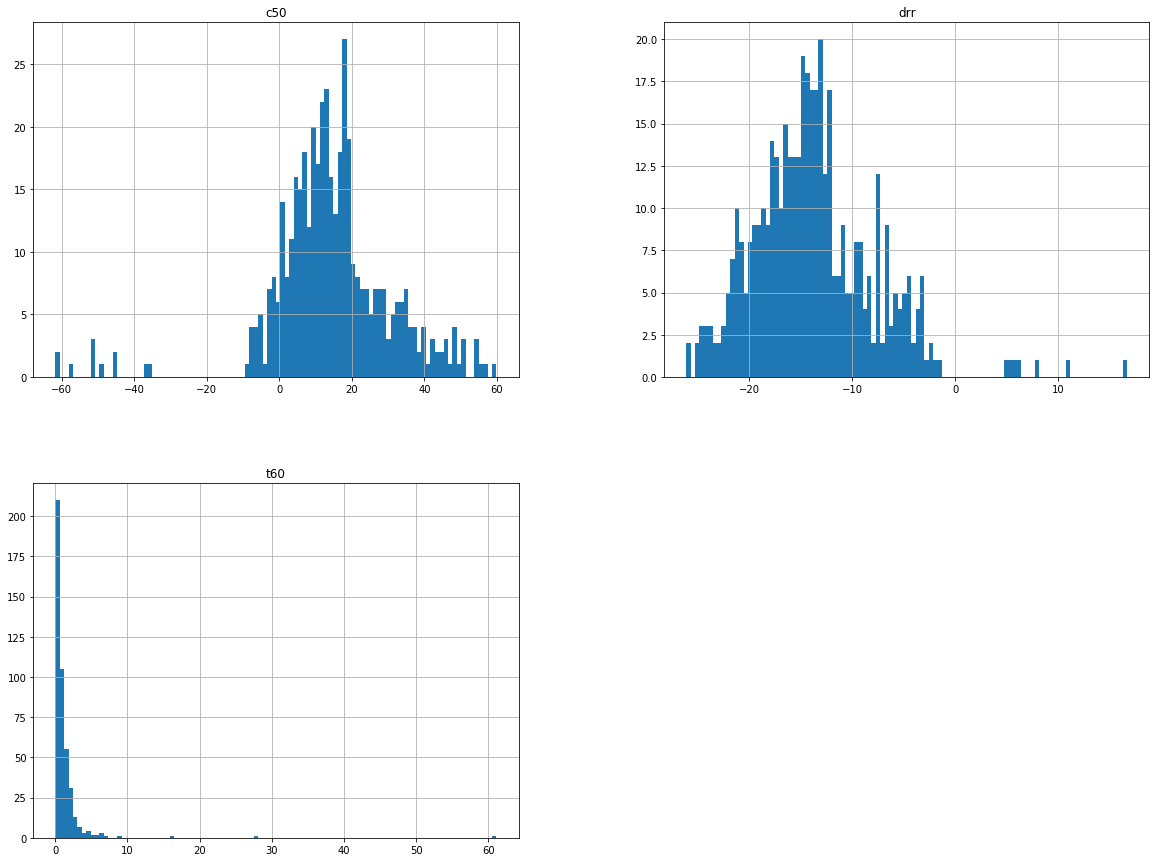

In [59]:
rir_dataset.hist(figsize=(20,15),bins=100)

In [67]:
rir_cleaned = rir_dataset[rir_dataset['t60']<4]
rir_cleaned = rir_cleaned[rir_cleaned['drr']<0]
rir_cleaned = rir_cleaned[rir_cleaned['c50']>-20]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef45c5d450>,
      dtype=object)

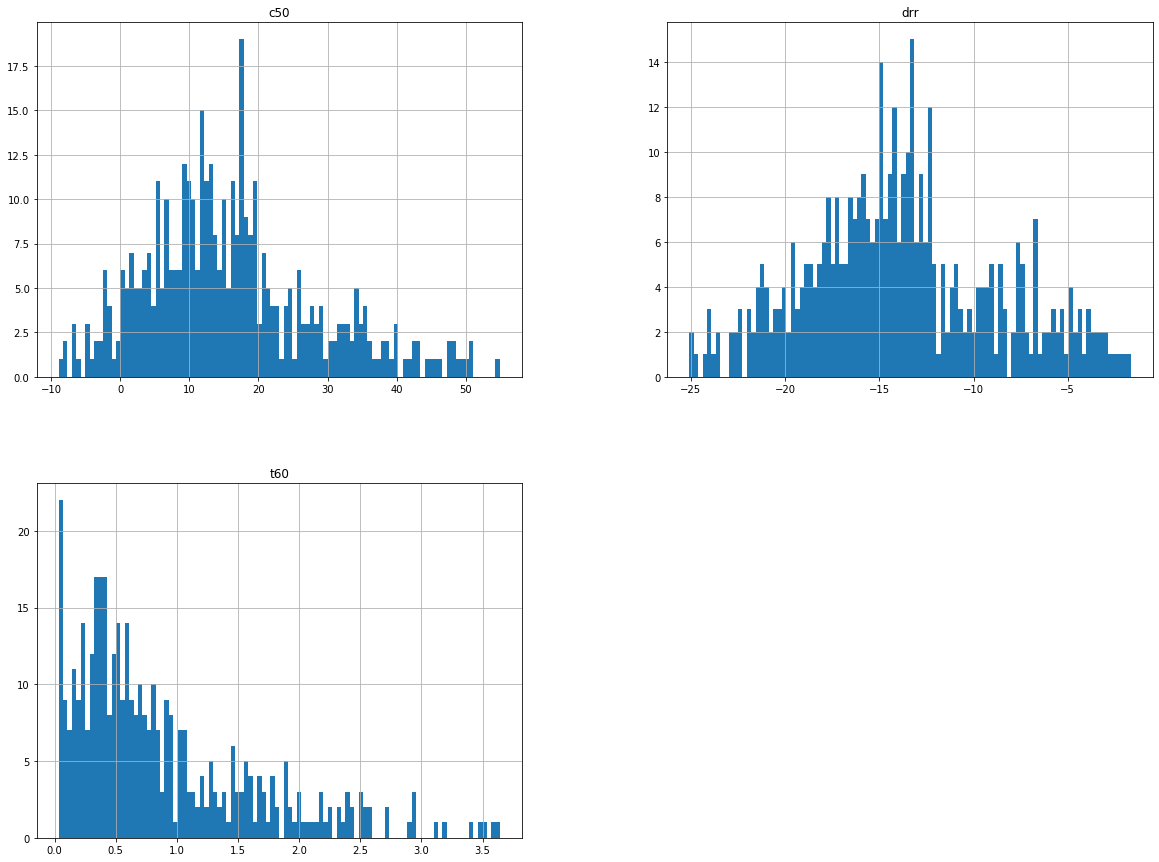

In [68]:
rir_cleaned.hist(figsize=(20,15),bins=100)

In [79]:
#Copy cleaned dataset in a new folder 
for name in rir_cleaned['RIR_name']:
    call('cp ' + str(rir_dir+(name)) + str(' RIRs/RIR_cleaned/'), shell=True)